Let's first setup our imports

In [23]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from sklearn import datasets
% matplotlib inline

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [7]:
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                     columns=iris['feature_names'] + ['target'])

Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

In [14]:
X=pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
y= iris['target']

In [21]:
X['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), dtype: float64

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

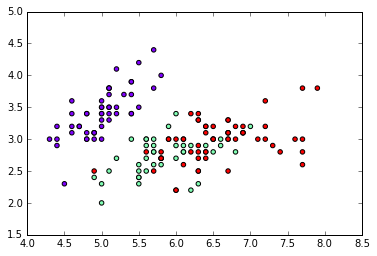

In [25]:
plt.scatter(X['sepal length (cm)'],X['sepal width (cm)'], c=y, cmap='rainbow')

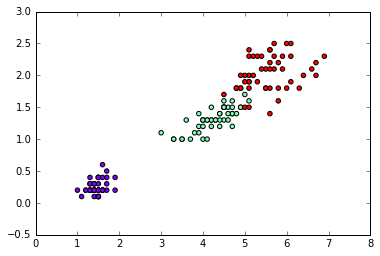

In [26]:
plt.scatter(X['petal length (cm)'],X['petal width (cm)'], c=y, cmap='rainbow')

In [34]:
df.iloc[:,:-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


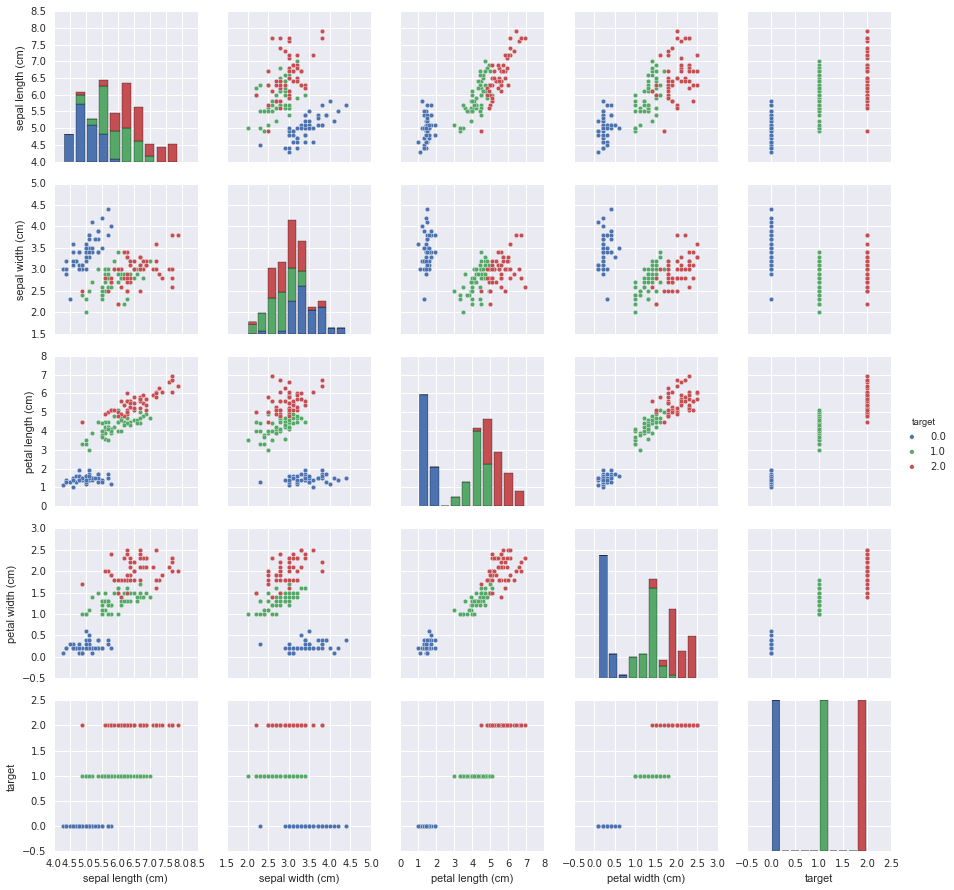

In [39]:
import seaborn as sns
sns.pairplot(df, hue="target")

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

In [42]:
k=3
kmeans=KMeans(n_clusters=k, random_state=2)
clusters=kmeans.fit_predict(X)
centroids=kmeans.cluster_centers_

Compute the labels and centroids

In [43]:
centroids

array([[ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

In [44]:
from scipy import stats
labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = stats.mode(y[mask])[0]

## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

Plot the clusters

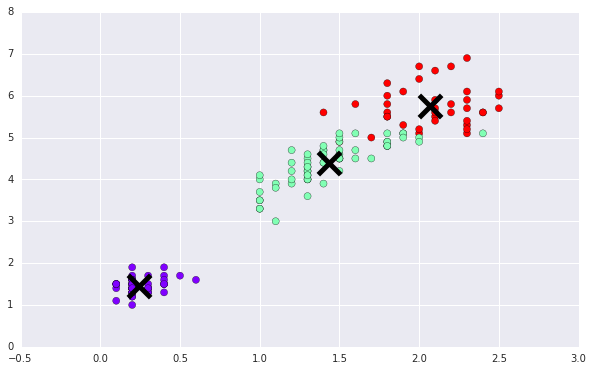

In [52]:
fig, ax =plt.subplots(figsize=(10,6))

plt.scatter(X.iloc[:,3],X.iloc[:,2], c=labels, s=50, cmap='rainbow')

plt.scatter(centroids[:, 3], centroids[:, 2],
            marker='x', s=500, linewidths=5,
            color='k', zorder=10)

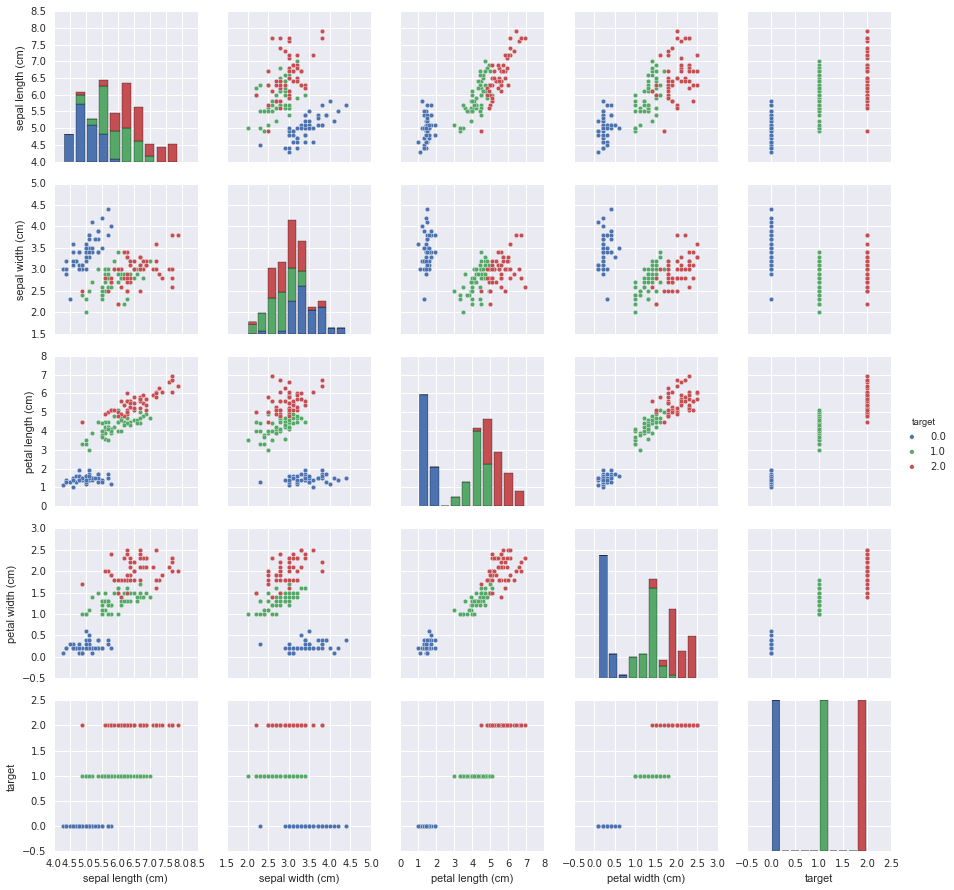

In [54]:
sns.pairplot(df, hue="target")

In [55]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

KeyError: 'labels'

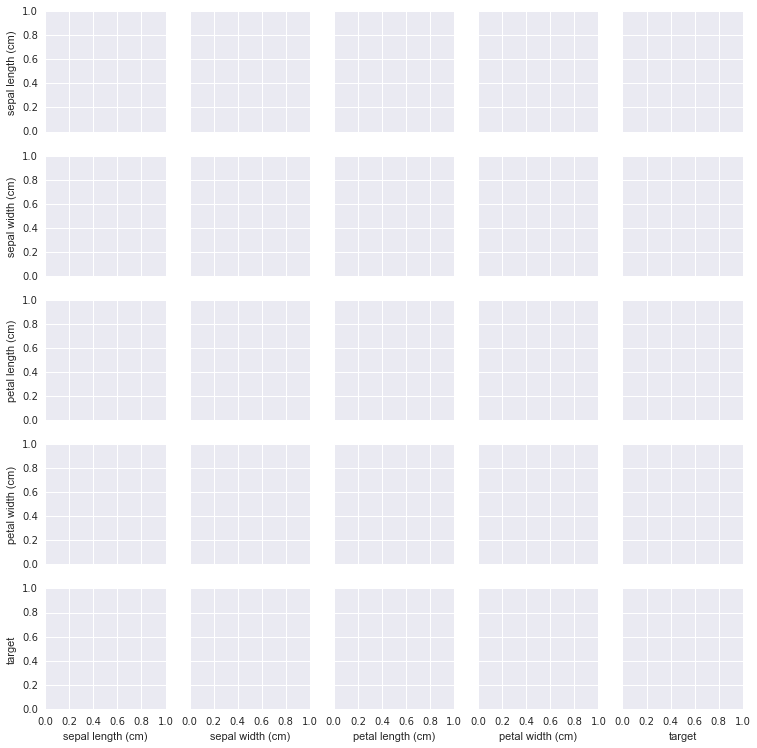

In [53]:
sns.pairplot(df, hue="labels")

Plot the predicted vs actual classifcations to see how our clustering analysis compares

Check the centroids to see where each cluster is lying 

Check the labels of the clusters

Compute the accuracy score using scikit to see how accurate our analysis is

Compute the silhoutte coefficient to see how consistent our data is within the clusters

Calculate the Precision, Recall, and F - Score to see the test's accuracy

Compute the Confusion Matrix to test the performance of the clustering analysis